In [ ]:
%matplotlib inline
import map_render
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy
plt.style.use('ggplot')

In [120]:
x_dots = np.arange(-135, 135, 1)
y_dots = np.arange(-135, 135, 1)
reward_map_data = np.zeros((len(x_dots), len(y_dots)))
distance_map_data = np.zeros((len(x_dots), len(y_dots)))

In [31]:
for i in tqdm(range(len(x_dots))):
    for j in range(len(y_dots)):
        sim_car_point = [x_dots[i], y_dots[j], 0]
        reward_map_data[i, j] = map_render.map_reward(sim_car_point)

100%|██████████| 270/270 [00:32<00:00,  8.37it/s]


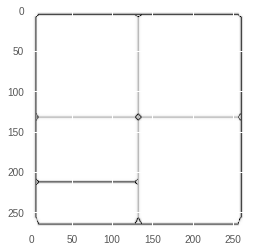

In [32]:
figure = plt.figure()
plt.imshow(reward_map_data)

In [121]:
x_dots_pre = np.arange(-135, 135, 0.1)
y_dots_pre = np.arange(-135, 135, 0.1)
reward_map_data_pre = np.zeros((len(x_dots_pre), len(y_dots_pre)))
for i in tqdm(range(len(x_dots_pre))):
    for j in range(len(y_dots_pre)):
        sim_car_point_pre = [x_dots_pre[i], y_dots_pre[j], 0]
        reward_map_data_pre[i, j] = map_render.map_reward(sim_car_point_pre)


  4%|▍         | 103/2700 [02:06<54:15,  1.25s/it]

KeyboardInterrupt: 

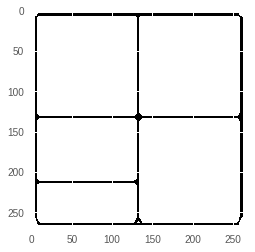

In [33]:
rw_tmp = copy.deepcopy(reward_map_data)
rw_tmp[rw_tmp > 0.2] = 1
rw_tmp[rw_tmp <= 0.2] = 0
plt.imshow(rw_tmp)

In [34]:
def gkernel_generator(n_size, sigma=1.0, mu=0.0):
    x, y = np.meshgrid(np.linspace(-1,1,n_size), np.linspace(-1,1,n_size))
    d = np.sqrt(x*x+y*y)
    sigma, mu = 1.0, 0.0
    g = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
    return g

In [35]:
#g_kernel = np.array([[0.3,0.4,0.5,0.4,0.3],[0.3,0.5,0.6,0.5,0.3], [0.3,0.6,1,0.6,0.3],[0.2,0.3,0.2]])
g_kernel = gkernel_generator(5)
g_kernel.shape

(5, 5)

In [36]:
from scipy import ndimage
conv_res = ndimage.convolve(rw_tmp, g_kernel, mode='nearest', cval=0.0)

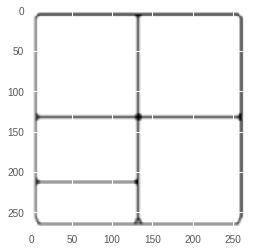

In [37]:
plt.imshow(conv_res)

In [39]:
type(filtered_mesh)

numpy.ndarray

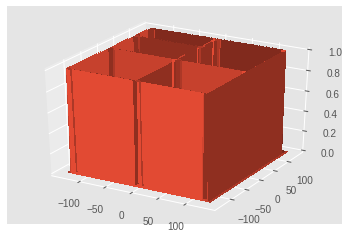

In [40]:
X_mesh, Y_mesh = np.meshgrid(x_dots, y_dots)
filtered_mesh = conv_res
filtered_mesh[filtered_mesh > 1] = 1
ax_3d = plt.axes(projection='3d')
# Plot the surface.
surf = ax_3d.plot_surface(X_mesh, Y_mesh, filtered_mesh,
                       linewidth=0, antialiased=False)
# dump the reward map data into file
dump_fname = 'reward_map.dat'
filtered_mesh.dump(dump_fname)

In [42]:
# load the reward map data from dat file
dump_fname = 'reward_map.dat'
loaded_map_data = np.load(dump_fname)

In [43]:
for i in tqdm(range(len(x_dots))):
    for j in range(len(y_dots)):
        sim_car_point = [x_dots[i], y_dots[j], 0]
        distance_map_data[i, j] = map_render.map_distance(sim_car_point)

100%|██████████| 270/270 [01:32<00:00,  2.85it/s]


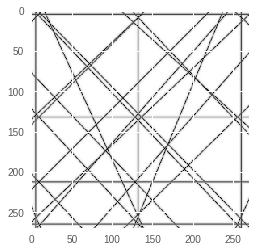

In [44]:
plt.imshow(distance_map_data)

In [45]:
X_mesh, Y_mesh = np.meshgrid(x_dots, y_dots)
Z_mesh = reward_map_data

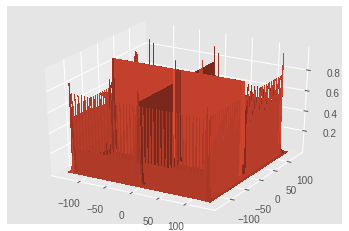

In [46]:
ax_3d = plt.axes(projection='3d')
# Plot the surface.
surf = ax_3d.plot_surface(X_mesh, Y_mesh, Z_mesh,
                       linewidth=0, antialiased=False)

In [ ]:
def __get_next_starting_point(self):

    # Get the current state of the vehicle
    car_state = self.__car_client.getCarState()

    # Pick a random road.
    random_line_index = np.random.randint(0, high=len(self.__road_points))

    # Pick a random position on the road. 
    # Do not start too close to either end, as the car may crash during the initial run.
    random_interp = (np.random.random_sample() * 0.4) + 0.3

    # Pick a random direction to face
    random_direction_interp = np.random.random_sample()

    # Compute the starting point of the car
    random_line = self.__road_points[random_line_index]
    random_start_point = list(random_line[0])
    random_start_point[0] += (random_line[1][0] - random_line[0][0]) * random_interp
    random_start_point[1] += (random_line[1][1] - random_line[0][1]) * random_interp

    # Compute the direction that the vehicle will face
    # Vertical line
    if (np.isclose(random_line[0][1], random_line[1][1])):
        if (random_direction_interp > 0.5):
            random_direction = (0, 0, 0)
        else:
            random_direction = (0, 0, math.pi)
    # Horizontal line
    elif (np.isclose(random_line[0][0], random_line[1][0])):
        if (random_direction_interp > 0.5):
            random_direction = (0, 0, math.pi / 2)
        else:
            random_direction = (0, 0, -1.0 * math.pi / 2)

    # The z coordinate is always zero
    random_start_point[2] = 0.01
    return (random_start_point, random_direction)

In [47]:
def init_road_points():
    road_points = []
    with open('./Shared/dump_road_lines.txt', 'r') as f:
        for line in f:
            points = line.split('\t')
            first_point = np.array([float(p) for p in points[0].split(',')] + [0])
            second_point = np.array([float(p) for p in points[1].split(',')] + [0])
            road_points.append(tuple((first_point, second_point)))
    return road_points

In [48]:
def get_random_pose():
    # Pick a random road.
    random_line_index = np.random.randint(0, high=len(road_points))

    # Pick a random position on the road.
    # Do not start too close to either end, as the car may crash during the initial run.
    random_interp = (np.random.random_sample() * 0.4) + 0.3

    # Pick a random direction to face
    random_direction_interp = np.random.random_sample()

    # Compute the starting point of the car
    random_line = road_points[random_line_index]
    random_start_point = list(random_line[0])
    random_start_point[0] += (random_line[1][0] - random_line[0][0]) * random_interp
    random_start_point[1] += (random_line[1][1] - random_line[0][1]) * random_interp

    # Compute the direction that the vehicle will face
    # Vertical line
    if (np.isclose(random_line[0][1], random_line[1][1])):
        if (random_direction_interp > 0.5):
            random_direction = (0, 0, 0)
        else:
            random_direction = (0, 0, math.pi)
    # Horizontal line
    elif (np.isclose(random_line[0][0], random_line[1][0])):
        if (random_direction_interp > 0.5):
            random_direction = (0, 0, math.pi / 2)
        else:
            random_direction = (0, 0, -1.0 * math.pi / 2)

    # The z coordinate is always zero
    random_start_point[2] = 0.01
    return (random_start_point, random_direction)

In [49]:
road_points = init_road_points()

In [72]:
a = [0,0]
theta = np.pi/4
b = np.array([np.cos(theta), np.sin(theta)])

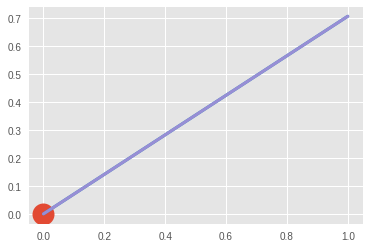

In [74]:
plt.plot([0], 'o', markersize=22)
plt.plot([[0,0], b], '-', linewidth=3)

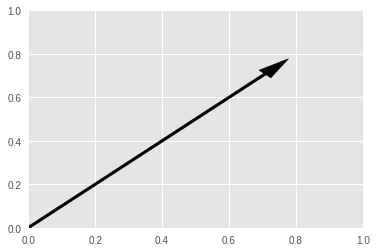

In [80]:
ax = plt.axes()
ax.arrow(0, 0, b[0], b[1], width=0.01, head_width=0.05, head_length=0.1, fc='k', ec='k')

In [81]:
def cal_arrowhead_pos(start_position, theta):
    return (start_position[0] + np.cos(theta), start_position[1] + np.sin(theta))

In [82]:
res = cal_arrowhead_pos([32, 11], 0.32*np.pi)

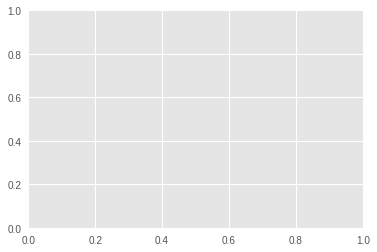

In [86]:
figure = plt.figure()
ax = plt.axes()
ax.arrow(32, 11,np.cos(theta), np.sin(theta), width=0.01, head_width=0.05, head_length=0.1, fc='k', ec='k')

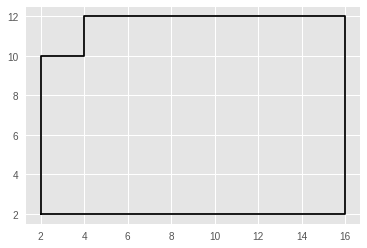

In [87]:
plt.plot([2,16,16,4,4,2,2], [2,2,12,12,10,10,2], 'k-')

In [88]:
arrow_data = [[0,-1,1,0,0],[0,0,1,-1,0]]

In [102]:
def arrow_fig(pos, theta):
    return [[pos[0],pos[0] + np.cos(theta + 5*np.pi/4),pos[0] + np.sqrt(2) * np.cos(theta),pos[0] + np.cos(theta + 3*np.pi/4),pos[0]],[pos[1],pos[1] + np.sin(theta + 5*np.pi/4),pos[1] + np.sqrt(2) * np.sin(theta),pos[1] + np.sin(theta + 3*np.pi/4),pos[1]]]

In [113]:
arrdata2 = arrow_fig([12,33], 0.25*np.pi)

Text(0, 0.5, 'y')

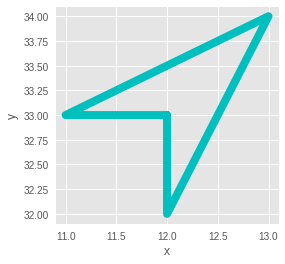

In [114]:
plt.figure(figsize=(4,4))
plt.plot(arrdata2[0], arrdata2[1], 'c-', linewidth=8)
plt.xlabel('x')
plt.ylabel('y')

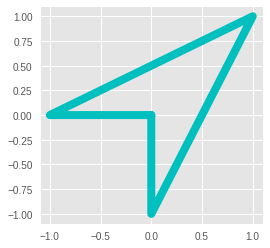

In [99]:
plt.figure(figsize=(4,4))
plt.plot(arrow_data[0], arrow_data[1], 'c-', linewidth=8)

In [100]:
np.cos(theta + 5*np.pi/4)

-0.7071067811865477

In [101]:
np.sin(theta + 5*np.pi/4)

-0.7071067811865475